In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [11]:
sensor_names=[f's_{i}' for i in range(1,22)]
settings=['set_1','set_2','set_3']
cols=['unit_nr','time_cycles']+settings+sensor_names
train=pd.read_csv(('CMAPSSData/train_FD001.txt'),sep='\s+',header=None,names=cols) # change it here
test=pd.read_csv(('CMAPSSData/test_FD001.txt'),sep='\s+',header=None,names=cols)#change it here
actual=pd.read_csv(('CMAPSSData/RUL_FD001.txt'),sep='\s+',header=None,names=['RUL'])#change it here
actual=actual.to_numpy().flatten().tolist()

In [12]:
train.loc[train['unit_nr']==1]

unit_nr  time_cycles   set_1   set_2  set_3     s_1     s_2      s_3  \
0          1            1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70   
1          1            2  0.0019 -0.0003  100.0  518.67  642.15  1591.82   
2          1            3 -0.0043  0.0003  100.0  518.67  642.35  1587.99   
3          1            4  0.0007  0.0000  100.0  518.67  642.35  1582.79   
4          1            5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85   
..       ...          ...     ...     ...    ...     ...     ...      ...   
187        1          188 -0.0067  0.0003  100.0  518.67  643.75  1602.38   
188        1          189 -0.0006  0.0002  100.0  518.67  644.18  1596.17   
189        1          190 -0.0027  0.0001  100.0  518.67  643.64  1599.22   
190        1          191 -0.0000 -0.0004  100.0  518.67  643.34  1602.36   
191        1          192  0.0009 -0.0000  100.0  518.67  643.54  1601.41   

         s_4    s_5  ...    s_12     s_13     s_14    s_15  s_16  s_17  s_18  \
0    1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03   392  2388   
1    1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03   392  2388   
2    1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03   390  2388   
3    1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03   392  2388   
4    1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03   393  2388   
..       ...    ...  ...     ...      ...      ...     ...   ...   ...   ...   
187  1422.78  14.62  ...  519.79  2388.23  8117.69  8.5207  0.03   396  2388   
188  1428.01  14.62  ...  519.58  2388.33  8117.51  8.5183  0.03   395  2388   
189  1425.95  14.62  ...  520.04  2388.35  8112.58  8.5223  0.03   398  2388   
190  1425.77  14.62  ...  519.57  2388.30  8114.61  8.5174  0.03   394  2388   
191  1427.20  14.62  ...  520.08  2388.32  8110.93  8.5113  0.03   396  2388   

      s_19   s_20     s_21  
0    100.0  39.06  23.4190  
1    100.0  39.00  23.4236  
2    100.0  38.95  23.3442  
3    100.0  38.88  23.3739  
4    100.0  38.90  23.4044  
..     ...    ...      ...  
187  100.0  38.51  22.9588  
188  100.0  38.48  23.1127  
189  100.0  38.49  23.0675  
190  100.0  38.45  23.1295  
191  100.0  38.48  22.9649  

[192 rows x 26 columns]

In [13]:
test.loc[test['unit_nr']==1]

unit_nr  time_cycles   set_1   set_2  set_3     s_1     s_2      s_3  \
0         1            1  0.0023  0.0003  100.0  518.67  643.02  1585.29   
1         1            2 -0.0027 -0.0003  100.0  518.67  641.71  1588.45   
2         1            3  0.0003  0.0001  100.0  518.67  642.46  1586.94   
3         1            4  0.0042  0.0000  100.0  518.67  642.44  1584.12   
4         1            5  0.0014  0.0000  100.0  518.67  642.51  1587.19   
5         1            6  0.0012  0.0003  100.0  518.67  642.11  1579.12   
6         1            7 -0.0000  0.0002  100.0  518.67  642.11  1583.34   
7         1            8  0.0006 -0.0000  100.0  518.67  642.54  1580.89   
8         1            9 -0.0036  0.0000  100.0  518.67  641.88  1593.29   
9         1           10 -0.0025 -0.0001  100.0  518.67  642.07  1585.25   
10        1           11  0.0007 -0.0004  100.0  518.67  642.04  1581.03   
11        1           12  0.0026  0.0003  100.0  518.67  642.54  1587.43   
12        1           13 -0.0056  0.0003  100.0  518.67  641.94  1589.09   
13        1           14  0.0017 -0.0004  100.0  518.67  642.23  1583.16   
14        1           15 -0.0003 -0.0003  100.0  518.67  642.50  1584.81   
15        1           16 -0.0018  0.0003  100.0  518.67  642.32  1584.51   
16        1           17  0.0014  0.0002  100.0  518.67  642.19  1582.70   
17        1           18  0.0035  0.0001  100.0  518.67  642.59  1586.53   
18        1           19  0.0029  0.0001  100.0  518.67  642.43  1585.58   
19        1           20  0.0011 -0.0001  100.0  518.67  642.61  1587.78   
20        1           21  0.0038 -0.0002  100.0  518.67  642.70  1583.30   
21        1           22  0.0012  0.0001  100.0  518.67  642.45  1582.78   
22        1           23  0.0009 -0.0000  100.0  518.67  642.12  1587.51   
23        1           24 -0.0006 -0.0001  100.0  518.67  642.32  1594.29   
24        1           25  0.0028 -0.0003  100.0  518.67  642.25  1582.43   
25        1           26  0.0047 -0.0005  100.0  518.67  642.48  1583.28   
26        1           27 -0.0007  0.0001  100.0  518.67  642.08  1586.65   
27        1           28  0.0022  0.0005  100.0  518.67  641.93  1594.25   
28        1           29  0.0014  0.0001  100.0  518.67  641.95  1587.15   
29        1           30 -0.0025  0.0004  100.0  518.67  642.79  1585.72   
30        1           31 -0.0006  0.0004  100.0  518.67  642.58  1581.22   

        s_4    s_5  ...    s_12     s_13     s_14    s_15  s_16  s_17  s_18  \
0   1398.21  14.62  ...  521.72  2388.03  8125.55  8.4052  0.03   392  2388   
1   1395.42  14.62  ...  522.16  2388.06  8139.62  8.3803  0.03   393  2388   
2   1401.34  14.62  ...  521.97  2388.03  8130.10  8.4441  0.03   393  2388   
3   1406.42  14.62  ...  521.38  2388.05  8132.90  8.3917  0.03   391  2388   
4   1401.92  14.62  ...  522.15  2388.03  8129.54  8.4031  0.03   390  2388   
5   1395.13  14.62  ...  521.92  2388.08  8127.46  8.4238  0.03   392  2388   
6   1404.84  14.62  ...  522.01  2388.06  8134.97  8.3914  0.03   391  2388   
7   1400.89  14.62  ...  522.09  2388.06  8125.93  8.4213  0.03   393  2388   
8   1412.28  14.62  ...  522.03  2388.05  8134.15  8.4353  0.03   391  2388   
9   1398.64  14.62  ...  522.00  2388.06  8134.08  8.4093  0.03   391  2388   
10  1403.83  14.62  ...  521.95  2388.06  8132.38  8.3919  0.03   391  2388   
11  1397.82  14.62  ...  522.01  2388.06  8132.33  8.3984  0.03   391  2388   
12  1403.94  14.62  ...  522.37  2388.03  8131.12  8.4166  0.03   392  2388   
13  1402.88  14.62  ...  521.95  2388.06  8130.30  8.4293  0.03   392  2388   
14  1398.79  14.62  ...  521.38  2388.00  8133.62  8.4163  0.03   392  2388   
15  1407.76  14.62  ...  522.16  2388.10  8133.83  8.4300  0.03   390  2388   
16  1404.12  14.62  ...  522.09  2388.02  8126.78  8.4577  0.03   391  2388   
17  1403.69  14.62  ...  522.14  2388.06  8133.22  8.4323  0.03   391  2388   
18  1402.30  14.62  ...  522.06  2388.01  8129.31  8.3892  0.03   391 

In [14]:
max_cycle_train=[]
for i in range(1,101):
    row=train.loc[train['unit_nr']==i]
    max_cycle_train.append(row['time_cycles'].max())

max_cycle_test=[]
for i in range(100):
    row=test.loc[test['unit_nr']==i+1]['time_cycles']
    max_cycle_test.append(len(row)+int(actual[i]))

the next thing in this implementation is to create a column that showes the remaining useful using the maximum number of time cycles that a single sample of turbofan engine has been run.

In [15]:
def add_rul(data,max_cycle):
    RUL=[]
    for i,j in enumerate(max_cycle):
        row=data.loc[data['unit_nr']==i+1]['time_cycles']
        for k in row:
            RUL.append(j-k)
    return RUL

train_rul=pd.DataFrame(add_rul(train,max_cycle_train))
train['RUL']=train_rul
test['RUL']=(add_rul(test,max_cycle_test))

In [16]:
train

unit_nr  time_cycles   set_1   set_2  set_3     s_1     s_2      s_3  \
0            1            1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70   
1            1            2  0.0019 -0.0003  100.0  518.67  642.15  1591.82   
2            1            3 -0.0043  0.0003  100.0  518.67  642.35  1587.99   
3            1            4  0.0007  0.0000  100.0  518.67  642.35  1582.79   
4            1            5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85   
...        ...          ...     ...     ...    ...     ...     ...      ...   
20626      100          196 -0.0004 -0.0003  100.0  518.67  643.49  1597.98   
20627      100          197 -0.0016 -0.0005  100.0  518.67  643.54  1604.50   
20628      100          198  0.0004  0.0000  100.0  518.67  643.42  1602.46   
20629      100          199 -0.0011  0.0003  100.0  518.67  643.23  1605.26   
20630      100          200 -0.0032 -0.0005  100.0  518.67  643.85  1600.38   

           s_4    s_5  ...     s_13     s_14    s_15  s_16  s_17  s_18   s_19  \
0      1400.60  14.62  ...  2388.02  8138.62  8.4195  0.03   392  2388  100.0   
1      1403.14  14.62  ...  2388.07  8131.49  8.4318  0.03   392  2388  100.0   
2      1404.20  14.62  ...  2388.03  8133.23  8.4178  0.03   390  2388  100.0   
3      1401.87  14.62  ...  2388.08  8133.83  8.3682  0.03   392  2388  100.0   
4      1406.22  14.62  ...  2388.04  8133.80  8.4294  0.03   393  2388  100.0   
...        ...    ...  ...      ...      ...     ...   ...   ...   ...    ...   
20626  1428.63  14.62  ...  2388.26  8137.60  8.4956  0.03   397  2388  100.0   
20627  1433.58  14.62  ...  2388.22  8136.50  8.5139  0.03   395  2388  100.0   
20628  1428.18  14.62  ...  2388.24  8141.05  8.5646  0.03   398  2388  100.0   
20629  1426.53  14.62  ...  2388.23  8139.29  8.5389  0.03   395  2388  100.0   
20630  1432.14  14.62  ...  2388.26  8137.33  8.5036  0.03   396  2388  100.0   

        s_20     s_21  RUL  
0      39.06  23.4190  191  
1      39.00  23.4236  190  
2      38.95  23.3442  189  
3      38.88  23.3739  188  
4      38.90  23.4044  187  
...      ...      ...  ...  
20626  38.49  22.9735    4  
20627  38.30  23.1594    3  
20628  38.44  22.9333    2  
20629  38.29  23.0640    1  
20630  38.37  23.0522    0  

[20631 rows x 27 columns]

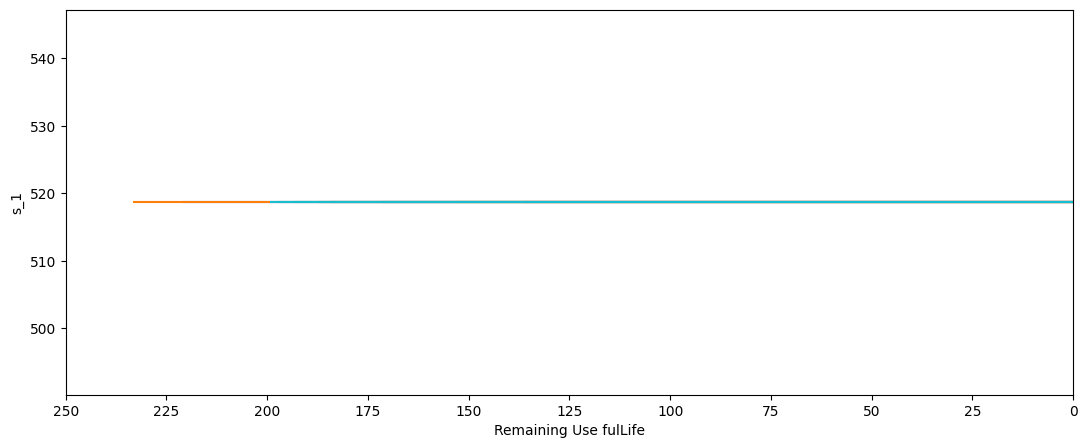

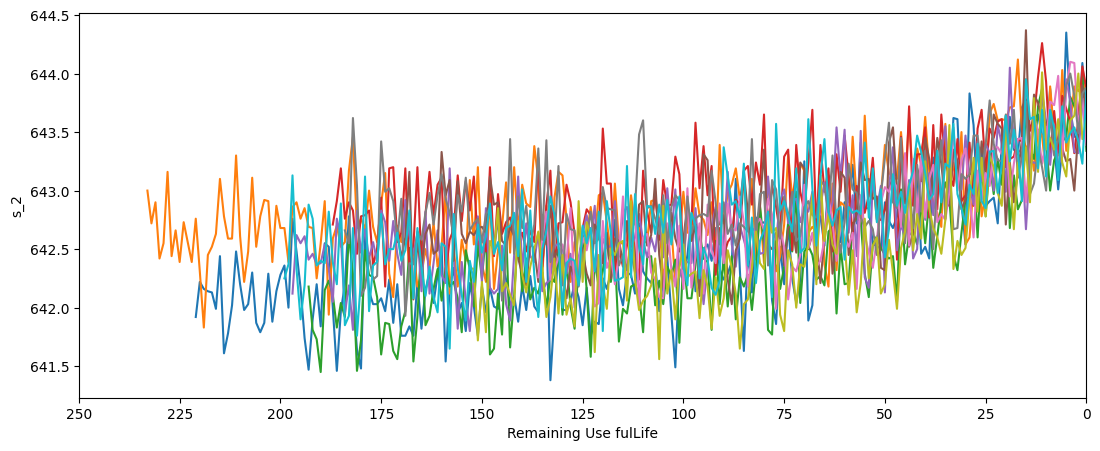

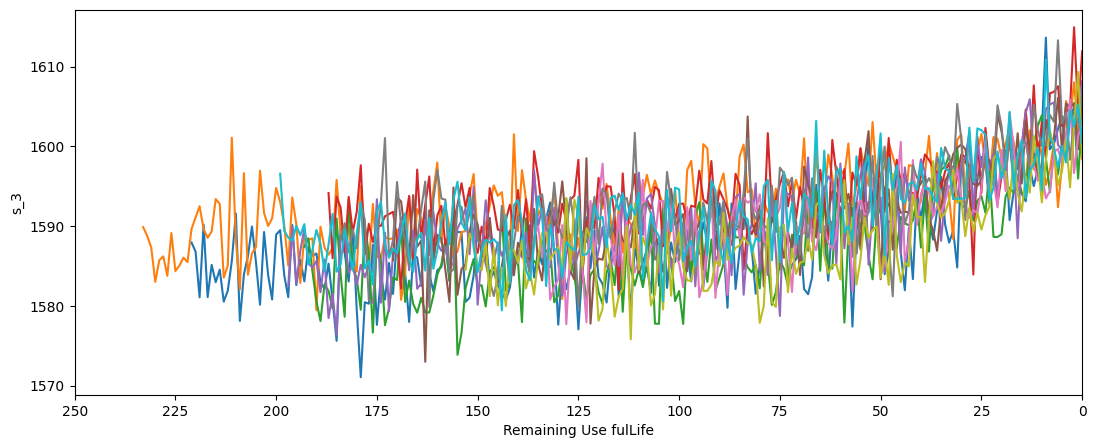

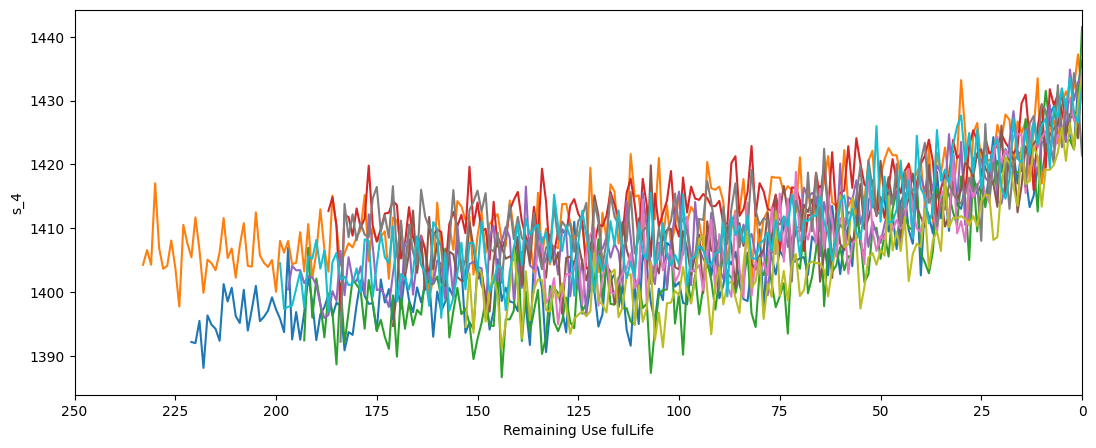

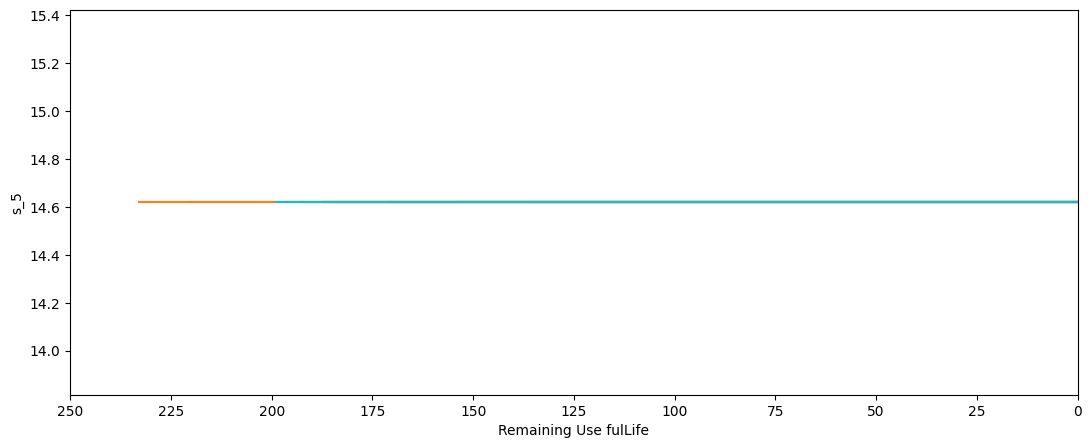

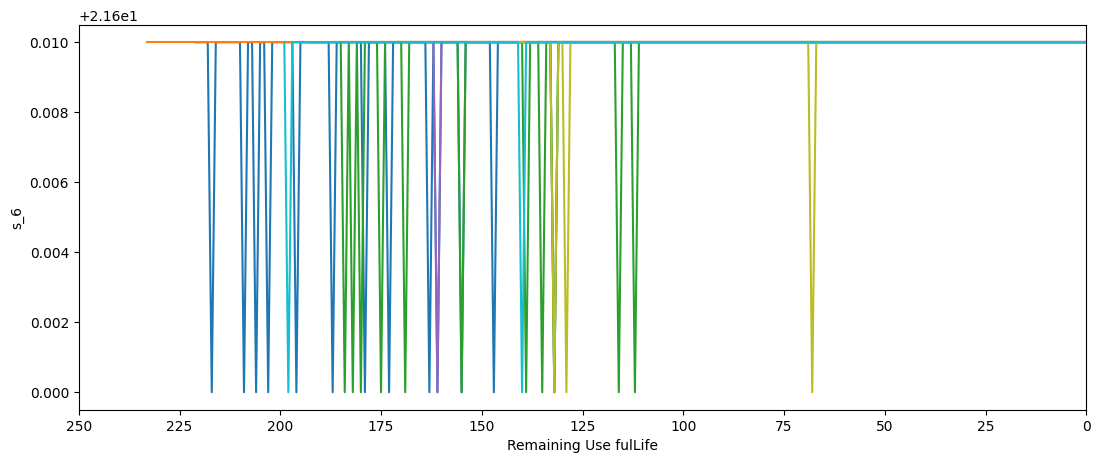

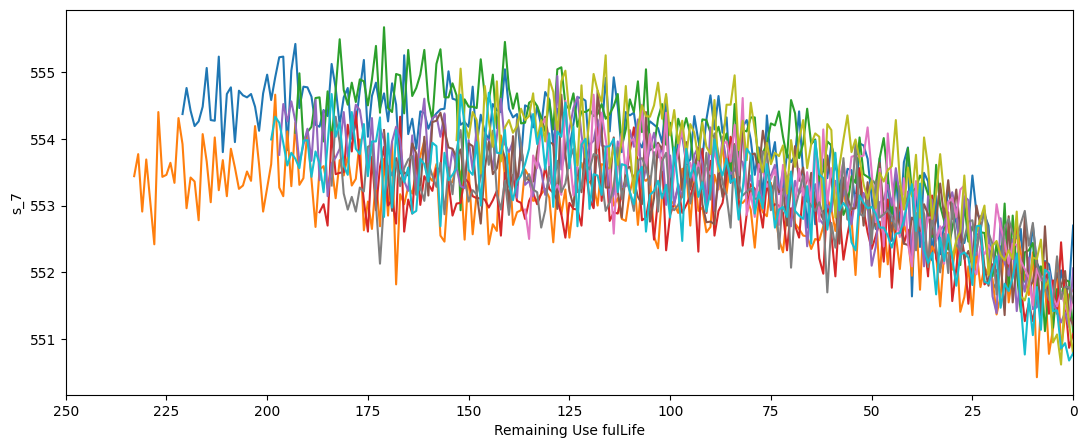

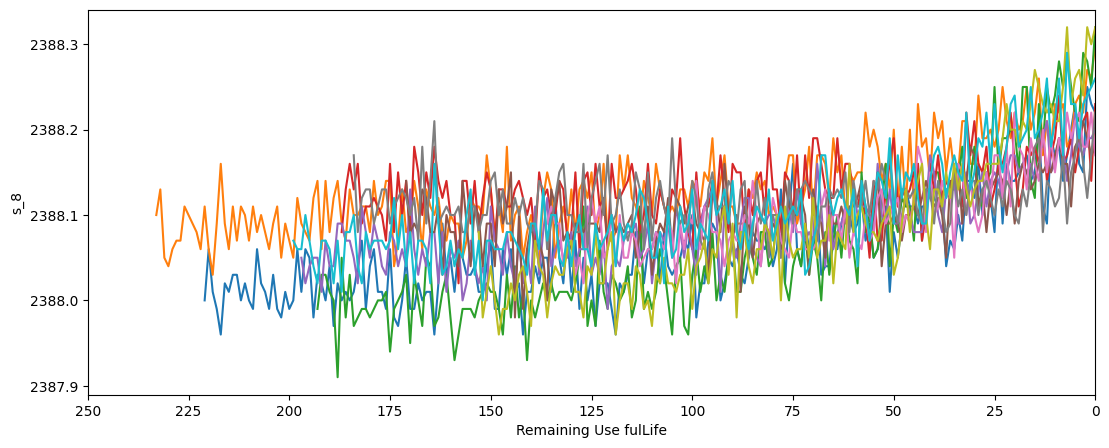

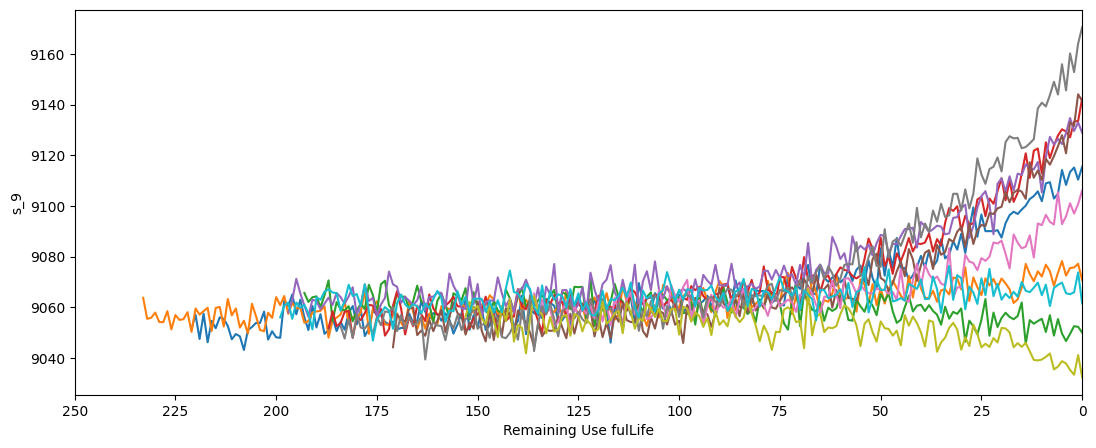

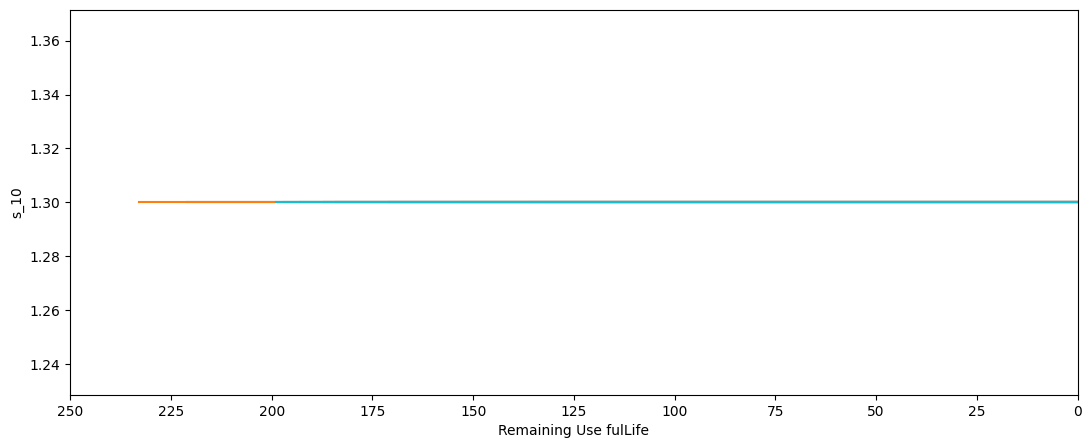

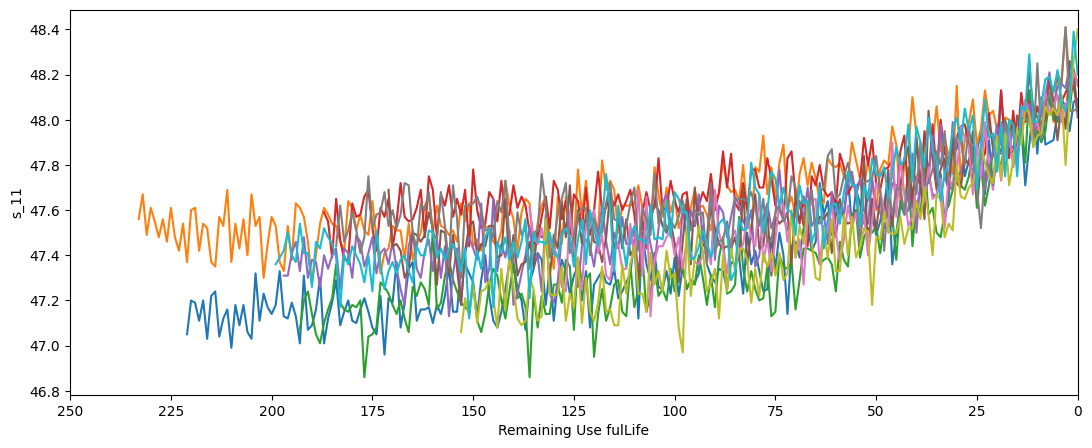

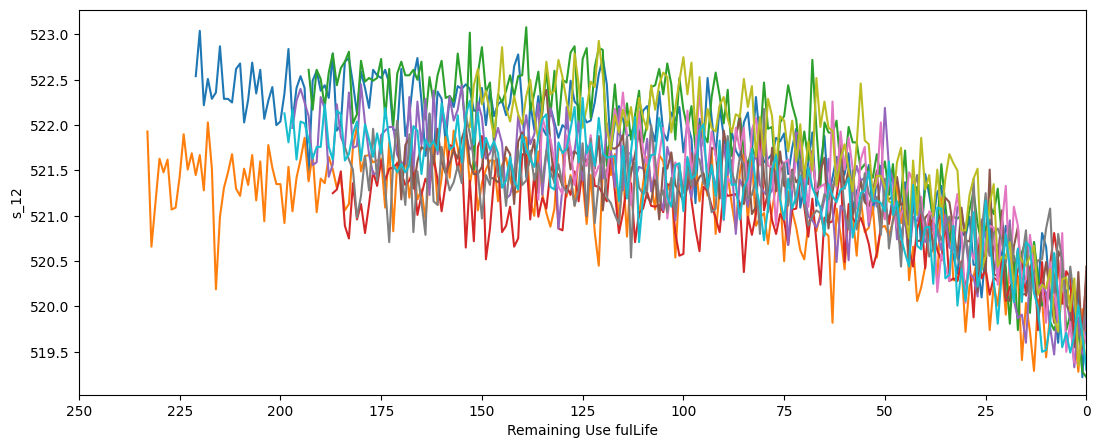

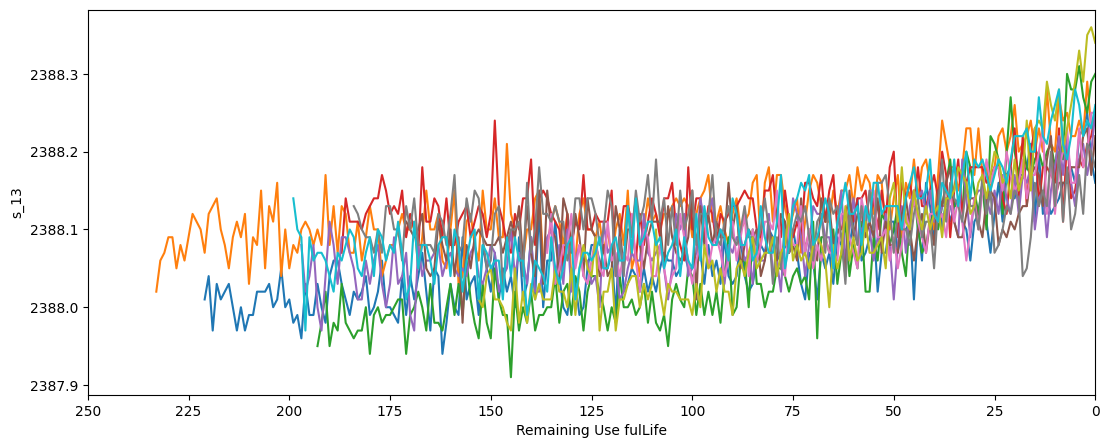

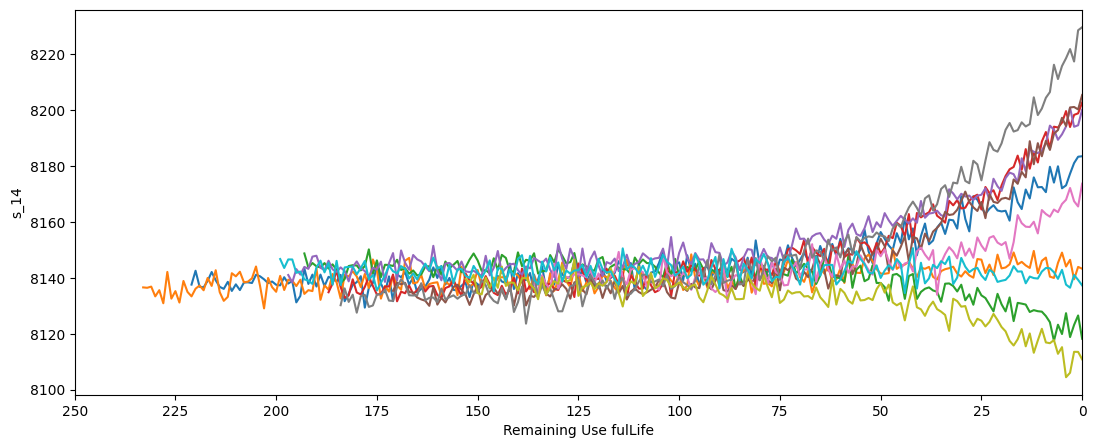

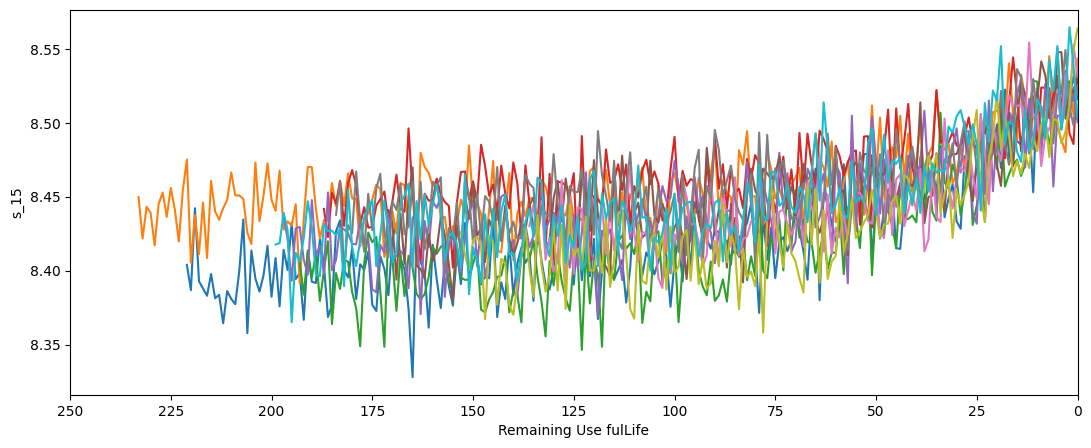

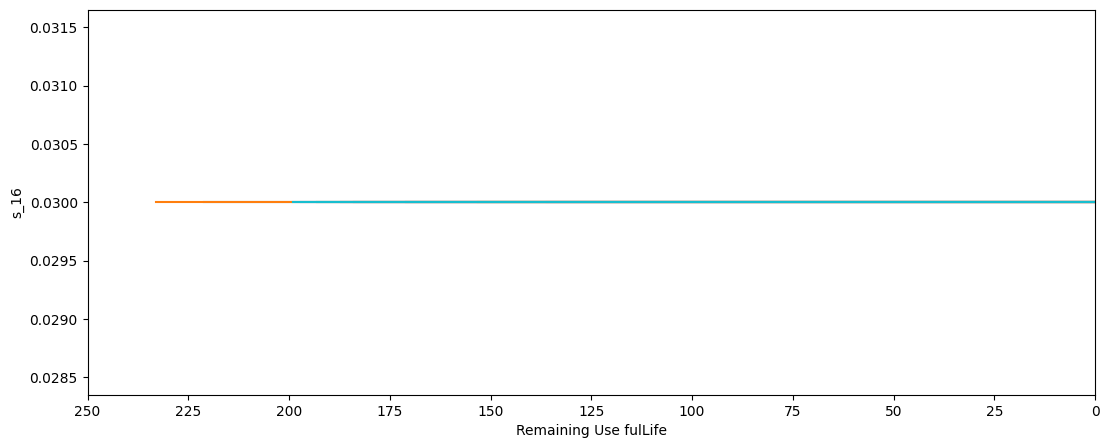

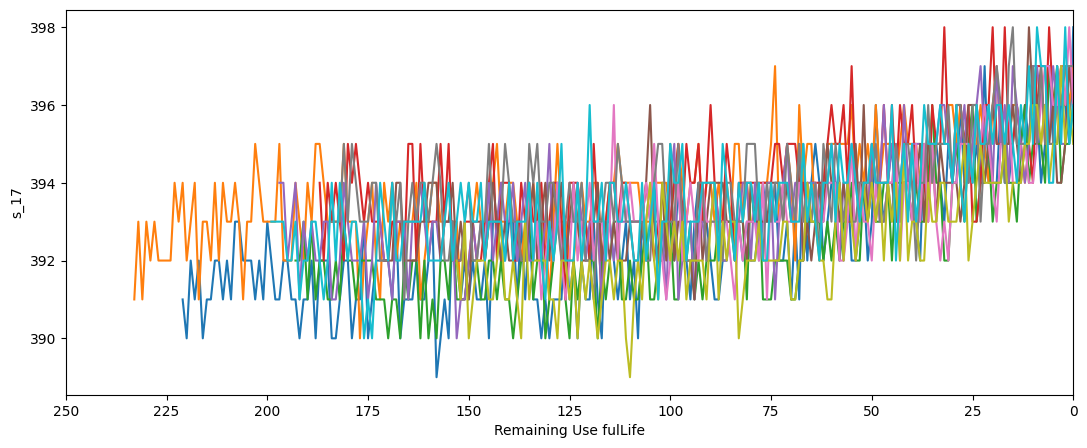

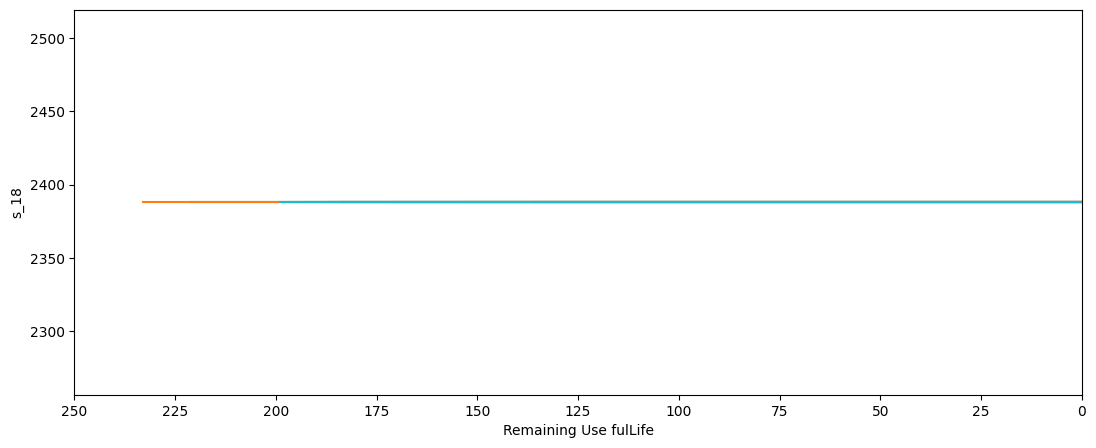

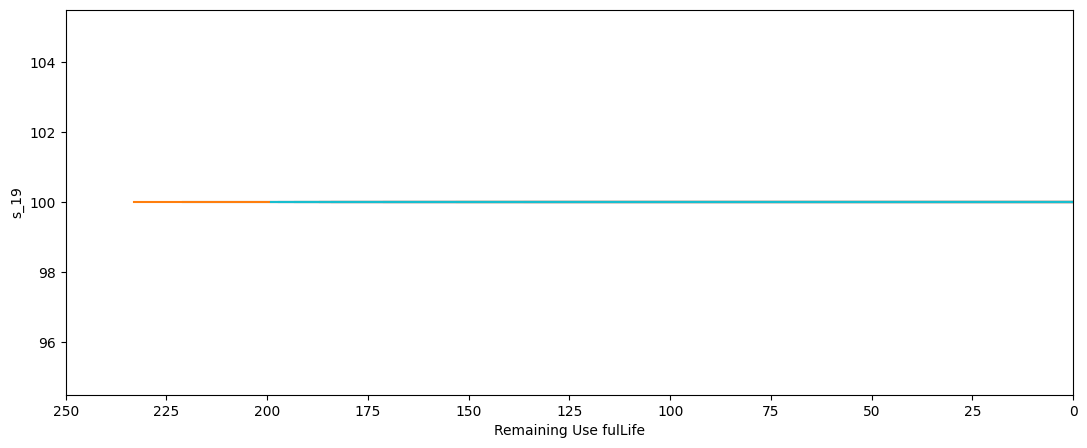

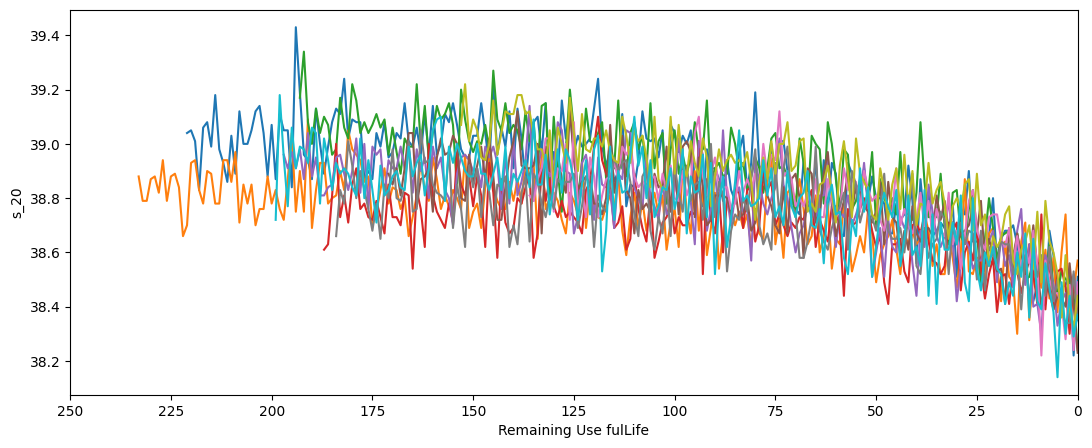

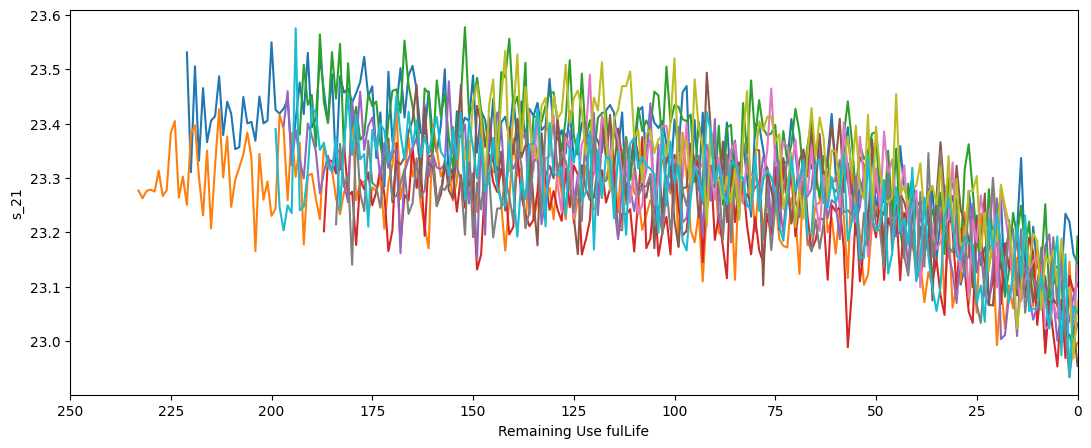

In [17]:
def plot_sensor(sensor_name):
    plt.figure(figsize=(13,5))
    for i in train['unit_nr'].unique():
        if (i % 10 == 0):  # only plot every 10th unit_nr
            plt.plot('RUL', sensor_name, 
                     data=train[train['unit_nr']==i])
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Use fulLife')
    plt.show()

for sensor_name in sensor_names:
    plot_sensor(sensor_name)

# feature selection:
from the above graphs we can see that not all the sensors have the same impact on the RUL(remaining useful life). So we drop the sensors that have no impact on the RUL

In [18]:
drop_sensors = ['s_1','s_5','s_6','s_10','s_16','s_18','s_19']
index_names=['time_cycles']
drop_labels = index_names+settings+drop_sensors
X_train = train.drop(drop_labels, axis=1)
X_test = test.drop(drop_labels, axis=1)

# Re-examine RUL
Our current assumption of RUL for the train set is that it declines linearly to zero. However, when we inspect the sensor signals they often show a 'bend' in their curve indicating degradation has started. Based on the information given to us we can't really say anything about RUL before this point, as we don't have any information on initial wear and tear of the engines.
Therefore, we assume RUL to start out constant and only decline linearly after some time. The aim is to get a similar 'bend' in the curve.
Starting out with a constant RUL achieves two things:

Initially constant RUL correlates better with the stable mean sensor signal
Lower peak values of RUL results in lower spread of our target variable, making it easier to fit a line

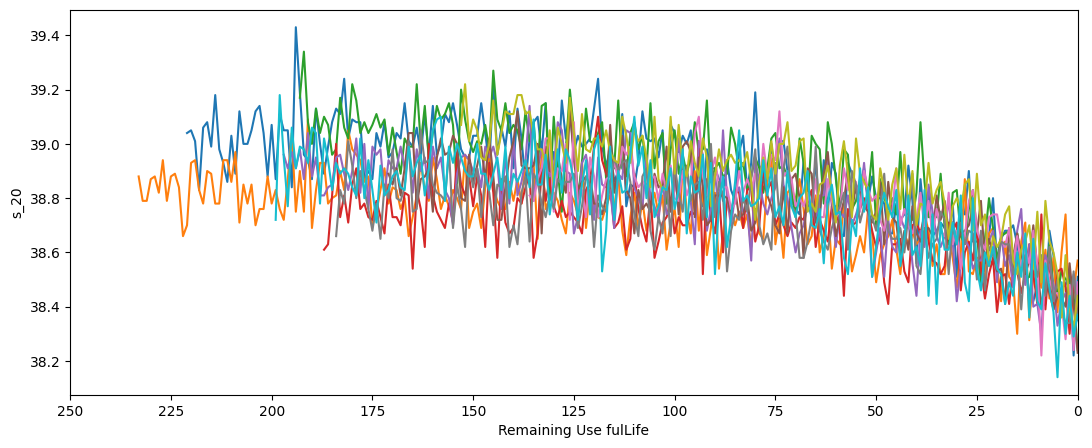

In [19]:
plt.figure(figsize=(13,5))
for i in train['unit_nr'].unique():
    if (i % 10 == 0):  # only plot every 10th unit_nr
        plt.plot('RUL', 's_20', 
                    data=train[train['unit_nr']==i])
plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
plt.xticks(np.arange(0, 275, 25))
plt.ylabel('s_20')
plt.xlabel('Remaining Use fulLife')
plt.show()

In [20]:
y_train_clipped = train['RUL'].clip(upper=130)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
X_test = test.groupby('unit_nr').last().reset_index().drop(drop_labels, axis=1)

In [23]:
X_test

unit_nr     s_2      s_3      s_4     s_7      s_8      s_9   s_11  \
0         1  642.58  1581.22  1398.91  554.42  2388.08  9056.40  47.23   
1         2  642.55  1586.59  1410.83  553.52  2388.10  9044.77  47.67   
2         3  642.88  1589.75  1418.89  552.59  2388.16  9049.26  47.88   
3         4  642.78  1594.53  1406.88  552.64  2388.13  9051.30  47.65   
4         5  642.27  1589.94  1419.36  553.29  2388.10  9053.99  47.46   
..      ...     ...      ...      ...     ...      ...      ...    ...   
95       96  642.30  1590.88  1397.94  553.99  2388.03  9062.41  47.14   
96       97  642.59  1582.96  1410.92  554.05  2388.06  9076.36  47.38   
97       98  642.68  1599.51  1415.47  553.44  2388.13  9062.34  47.66   
98       99  642.00  1585.03  1397.98  554.75  2388.01  9067.16  47.26   
99      100  642.95  1601.62  1424.99  552.48  2388.06  9155.03  47.80   

      s_12     s_13     s_14    s_15  s_17   s_20     s_21  RUL  
0   521.79  2388.06  8130.11  8.4024   393  38.81  23.3552  112  
1   521.74  2388.09  8126.90  8.4505   391  38.81  23.2618   98  
2   520.83  2388.14  8131.46  8.4119   395  38.93  23.2740   69  
3   521.88  2388.11  8133.64  8.4634   395  38.58  23.2581   82  
4   521.00  2388.15  8125.74  8.4362   394  38.75  23.4117   91  
..     ...      ...      ...     ...   ...    ...      ...  ...  
95  522.30  2388.01  8148.24  8.4110   391  38.96  23.4606  137  
96  521.58  2388.06  8155.48  8.4500   395  38.61  23.2953   82  
97  521.53  2388.09  8146.39  8.4235   394  38.76  23.3608   59  
98  521.82  2388.02  8150.38  8.4003   391  38.95  23.3595  117  
99  521.07  2388.05  8214.64  8.4903   396  38.70  23.1855   20  

[100 rows x 16 columns]

In [24]:
X_train,Y_train=X_train.iloc[:,1:15],X_train['RUL']
X_test,Y_test=X_test.iloc[:,1:15],X_test['RUL']

In [25]:
model=LinearRegression()
model.fit(X_train,y_train_clipped)

LinearRegression()

In [26]:
result=model.predict(X_test)

In [27]:
from sklearn.metrics import r2_score,root_mean_squared_error

In [28]:
r2_score(Y_test,result)

0.7182360200205303

In [29]:
root_mean_squared_error(Y_test,result)

22.058323857481888